##  Prediction Using Supervised Machine Learning

# Simple Liner Regression

Based on the number of hours a student has studied, we will estimate the percentage of marks they should receive in this regression assignment. Given that there are only two variables, this linear regression assignment is straightforward.

# Importing Libraries

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np  
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
import warnings
warnings.filterwarnings('ignore')

In [4]:
url = "http://bit.ly/w-data"
Data = pd.read_csv(url)
Data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
Data.shape

(25, 2)

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
Data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Percentage Score')

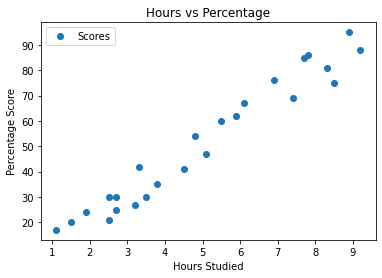

In [8]:
Data.plot(x = 'Hours', y = 'Scores', style = 'o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')

It can be observed that there is a linear increase in the percentage of score as the number of hours spent studying.

## Training The Data

In [9]:
X = Data.iloc[:,:-1].values
y = Data.iloc[:, 1].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 0)

In [11]:
reg_lr = LinearRegression()  
reg_lr.fit(X_train, y_train) 

LinearRegression()

LinearRegression()
In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org

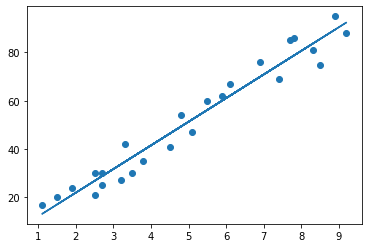

In [12]:
line = reg_lr.coef_*X+reg_lr.intercept_

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [13]:
print(X_test) # Testing data - In Hours
y_pred = reg_lr.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]
 [3.8]
 [1.9]
 [7.8]]


# Comparing Actual vs Predicted

In [14]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,17.053665
1,27,33.694229
2,69,74.806209
3,30,26.842232
4,62,60.123359
5,35,39.567369
6,24,20.969092
7,86,78.721636


In [15]:
hours = 9.25
print("No of Hours =", hours)
print("Predicted Score =",reg_lr.predict(np.array(hours).reshape(-1,1)))

No of Hours = 9.25
Predicted Score = [92.91505723]


# Evaluating The Modle

In [16]:
y_pred = reg_lr.predict(X_test)
reg_lr.score(X_train,y_train)

0.9484997422695115

In [17]:
reg_lr.score(X_test,y_test)

0.9568211104435257

In [18]:
print("R2 Score: ", metrics.r2_score(y_test, y_pred)) 

R2 Score:  0.9568211104435257


In [19]:
print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_pred))

Mean Squared Error:  22.96509721270043
Mean Absolute Error:  4.419727808027652
